# DeepSIBA example 1 : Train ensemble
In this example a deepSIBA ensemble model will be trained from scratch using the model_params and train_params dictionaries

In [1]:
model_params = {
    "max_atoms" : int(60), "num_atom_features" : int(62), "max_degree" : int(5), "num_bond_features" : int(6),
    "graph_conv_width" : [128,128,128], "conv1d_filters" : int(128), "conv1d_size" : int(29), "dropout_encoder" : 0.25,
    "conv1d_filters_dist" : [128,128], "conv1d_size_dist" : [17,1], "dropout_dist" : 0.25, "pool_size" : int(4),
    "dense_size" : [256,128,128], "l2reg" : 0.01, "dist_thresh" : 0.2, "lr" : 0.001 
}

The model_params dictionary contains the parameters to build the deepSIBA siamese GCN architecture, more specifically:
1. **max_atoms, num_atom_features, max_degree and num_bond_features** refer to the parameters needed to featurize the input chemical structures. For more information, refer to the *ESI of the deepSIBA publication*.
2. **graph_conv_width, conv1d_filters, conv1d_size, dropout_encoder** refer to the parameters of the siamese graph encoders.
3. **conv1d_filters_dist, conv1d_size_dist, dropout_dist, pool_size, dense_size, l2reg** refer to the parameters of the distance module.
4. **dist_thresh** is the distance threshold to consider 2 chemical structures similar in biological effect (needed for custom training metrics).
5. **lr** is the learning rate.

In [2]:
train_params = {
    "cell_line" : "a375", "split" : "train_test_split", "number_folds" : [0],
    "output_dir" : "../results/test1",
    "batch_size" : int(128), "epochs" : int(20), 
    "N_ensemble" : int(5), "nmodel_start" : int(2), "prec_threshold" : 0.2
}

The train_params dictionary contains the parameters required to train deepSIBA:
1. **cell_line** is the cellular model of choice out of **(a375,pc3,vcap,mcf7)** for which we have enough available data. Later a merged option will be added.
2. **split** is one of **(train_test_split,5_fold_cv_split)**. The data to train the models are available in this **drive link**.
3. **number_folds** is a list, if split == train_test_split the number_folds should be [0]. If the split is a 5_fold_cv_split the number_folds should be [0,1,2,3,4] in order to train the model in all splits. If you want to train a model on a specific fold, e.g. the 3rd one, the number_folds should be [2].
4. **output_dir** is the full path to the specified output directory.
5. **N_ensemble** is the number of models to train and include in the ensemble.
6. **nmodel_start** this should be set to 0 if training for the first time, but if training is halted, nmodel_start specifies the model number in the ensemble to start training from.
7. **prec_threshold** is the distance threshold to consider 2 chemical structures similar in biological effect (needed for custom training metrics).

In [2]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: /device:GPU:0


In [3]:
from deepSIBA_train import siba_trainer
example_1 = siba_trainer(train_params, model_params)

Using TensorFlow backend.


# DeepSIBA example 2 : Load trained ensemble and predict
In this example a trained deepSIBA ensemble model will be loaded and used to make predictions for the appropriate test set.
For each of the cell lines, trained ensembles of either 50 or 10 models for all available splits, can be found in **drive link**

**DO NOT RUN THE FOLLOWING NOTEBOOK CELL IF YOU HAVE ALREADY RUN IT IN THE PREVIOUS EXAMPLES**

In [1]:
import tensorflow as tf
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config = config)

# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.test.gpu_device_name())

The following GPU devices are available: /device:GPU:0


In [2]:
model_params = {
    "max_atoms" : int(60), "num_atom_features" : int(62), "max_degree" : int(5), "num_bond_features" : int(6),
    "graph_conv_width" : [128,128,128], "conv1d_filters" : int(128), "conv1d_size" : int(29), "dropout_encoder" : 0.25,
    "conv1d_filters_dist" : [128,128], "conv1d_size_dist" : [17,1], "dropout_dist" : 0.25, "pool_size" : int(4),
    "dense_size" : [256,128,128], "l2reg" : 0.01, "dist_thresh" : 0.2, "lr" : 0.001 
}

First of all the compiled model is loaded with the parameters (model_params) as described in example 1.

In [3]:
from deepSIBA_model import siamese_model,enc_graph
siamese_net=siamese_model(model_params)
print(siamese_net.summary())

Using TensorFlow backend.
W0412 21:47:33.232439 140163360966464 deprecation_wrapper.py:119] From /home/biolab/miniconda3/envs/nikos/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0412 21:47:33.237210 140163360966464 deprecation_wrapper.py:119] From /home/biolab/miniconda3/envs/nikos/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0412 21:47:33.238387 140163360966464 deprecation_wrapper.py:119] From /home/biolab/miniconda3/envs/nikos/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0412 21:47:33.357982 140163360966464 deprecation_wrapper.py:119] From /home/biolab/miniconda3/envs/nikos/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: 

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
atom_inputs_1 (InputLayer)      (None, 60, 62)       0                                            
__________________________________________________________________________________________________
bond_inputs_1 (InputLayer)      (None, 60, 5, 6)     0                                            
__________________________________________________________________________________________________
edge_inputs_1 (InputLayer)      (None, 60, 5)        0                                            
__________________________________________________________________________________________________
atom_inputs_2 (InputLayer)      (None, 60, 62)       0                                            
__________________________________________________________________________________________________
bond_input

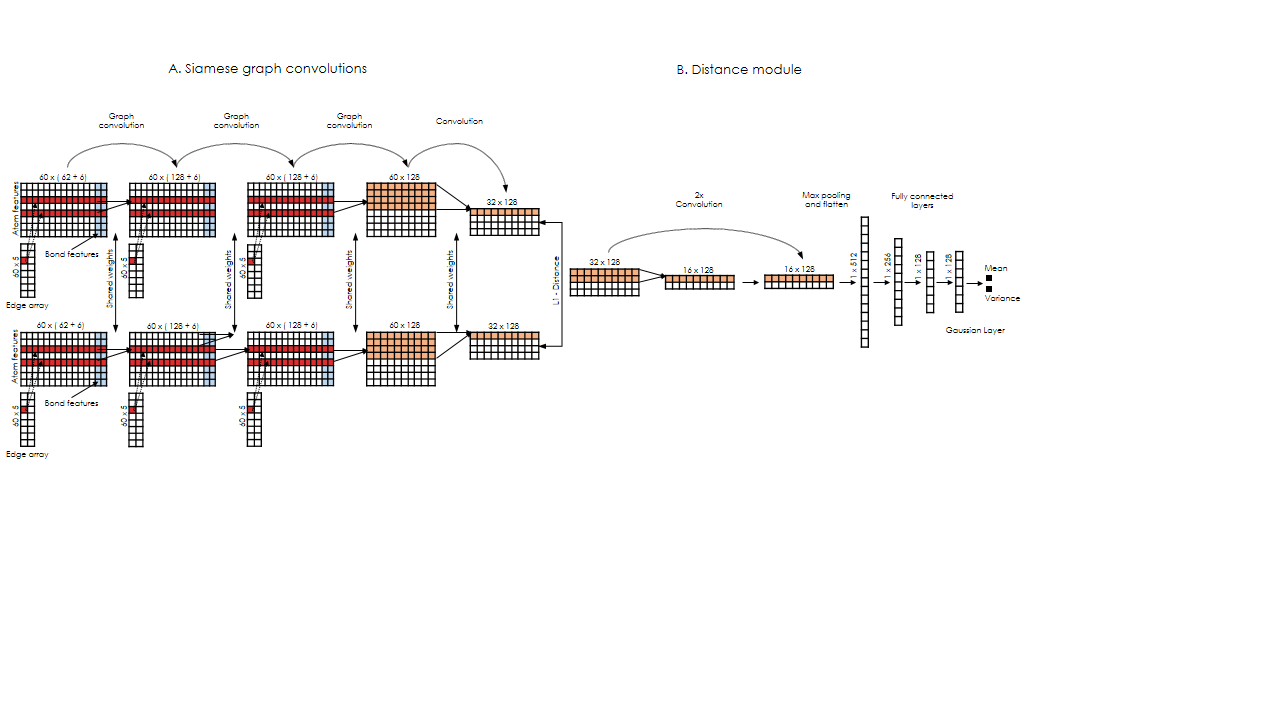

In [17]:
test_params = {
    "cell_line" : "vcap", "split" : "5_fold_cv_split", "fold_id" : int(2),
    "N_ensemble" : int(10), "prec_threshold" : 0.2,
    "name_pattern":"siam_no_augment"
}

The test_params dictionary contains the parameters required to train deepSIBA:
1. **cell_line** is the cellular model of choice out of **(a375,pc3,vcap,mcf7)** for which we have enough available data. Later a merged option will be added.
2. **split** is one of **(train_test_split,5_fold_cv_split)**. The predictions for these validation sets are available in this **drive link**.
3. **fold_id** is an integer, if split == train_test_split the fold_id should be 0. If the split is a 5_fold_cv_split the fold_id should be 0,1,2,3 or 4 (one less than the corresponding folder's name for this fold) in order to test the model's performance in **a specific split**.
4. **N_ensemble** is the number of total already trained models and at the same time the models included in the ensembled prediction.
5. **prec_threshold** is the distance threshold to consider 2 chemical structures similar in biological effect (needed for custom training metrics).
6. **name_pattern** is the pattern of the name of files of models' saved weights. **For example** if the weights are saved in files with names such as **siam_no_augment_18.h5** the **pattern is siam_no_augment** .

**NOTE:** The saved model weights are in the subfolders of "trained_models/" and their exact position is descrebed fully given **cell_line** and **split** parameters. All these are saved inside learning folder

In [18]:
from deepSIBA_ensembles import siba_val_loader
df_cold=siba_val_loader(test_params, model_params,siamese_net)

Get the ensmbled predictions with siba_val_loader function.
The data frame with the predictions and the corresponding CV (coefficient of variance) of each preidiction is presented as follows:

**NOTE:** All distance values have been adjusted in the range 0 to 1.

In [19]:
df_cold

,X.1,X,Var1,Var2,value,sig_id.x,pert_iname.x,quality.x,rdkit.x,pert_dose.x,...,sig_id.y,pert_iname.y,quality.y,rdkit.y,pert_dose.y,pert_time.y,iscoldx,iscoldy,mu,cv
0,1,1,BRD-A06276885,BRD-A89434049,0.342175,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_24H:BRD-A89434049-001-02-1:10,sarmentogenin,1,CC12CCC(O)CC1CCC1C2[C@H](O)CC2(C)C(C3=CC(=O)OC...,10.0000,24,True,False,0.306714,0.184514
1,2,2,BRD-A06276885,BRD-K03816923,0.236281,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_24H:BRD-K03816923-001-04-7:10,rottlerin,1,CC(=O)c1c(O)c(C)c(O)c(Cc2c(O)c3c(c(C(=O)/C=C/c...,10.0000,24,True,False,0.416854,0.162020
2,4,4,BRD-A06276885,BRD-K07212038,0.315314,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_24H:BRD-K07212038-001-02-1:10,selinidin,1,C/C=C(/C)C(=O)O[C@@H]1Cc2c(ccc3ccc(=O)oc23)OC1...,10.0000,24,True,False,0.337046,0.189844
3,7,7,BRD-A06276885,BRD-K15935639,0.292755,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_24H:BRD-K15935639-001-02-0:10,z-leu3-VS,1,CC(C)C[C@@H](/C=C/S(C)(=O)=O)NC(=O)[C@H](CC(C)...,10.0000,24,True,False,0.328563,0.191405
4,11,11,BRD-A06276885,BRD-K74305673,0.134449,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_24H:BRD-K74305673-001-01-3:10,IKK-2-inhibitor-V,1,O=C(Nc1cc(C(F)(F)F)cc(C(F)(F)F)c1)c1cc(Cl)ccc1O,10.0000,24,True,False,0.393561,0.188307
5,16,16,BRD-A06276885,BRD-K81418486,0.262367,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_24H:BRD-K81418486:10,vorinostat,1,O=C(CCCCCCC(=O)Nc1ccccc1)NO,10.0000,24,True,False,0.380541,0.167814
6,22,22,BRD-A06276885,BRD-K81807412,0.206640,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_24H:BRD-K81807412-001-03-1:10,BRD-K81807412,1,CNc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O,10.0000,24,True,False,0.308660,0.255871
7,29,29,BRD-A06276885,BRD-A17065207,0.375702,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_6H:BRD-A17065207-001-06-9:10,brefeldin-a,1,CC1CCCC=CC2CC(O)CC2C(O)C=CC(=O)O1,10.0000,6,True,False,0.425233,0.160667
8,37,37,BRD-A06276885,BRD-A38913120,0.782920,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_6H:BRD-A38913120-001-01-0:10,BH3I-1,1,CC(C)C(C(=O)O)N1C(=O)/C(=C/c2ccc(Br)cc2)SC1=S,10.0000,6,True,False,0.639049,0.138834
9,46,46,BRD-A06276885,BRD-A49734948,0.216258,CPC001_VCAP_24H:BRD-A06276885-003-01-1:10,BRD-A06276885,1,Oc1ccc2c3c1OC1c4c(c5ccccc5n4Cc4ccccc4)CC4(O)C(...,10.00000,...,CPC001_VCAP_6H:BRD-A49734948-001-03-3:10,foliosidine,1,COc1cc(=O)n(C)c2c(OCC(O)C(C)(C)O)cccc12,10.0000,6,True,False,0.320828,0.218770


Finally the models performace together with a scatterplot of the predicted values VS the true values of the test set, are given bellow:

**NOTE:** If there in zero ensembled prediction lower than the precision threshold defined the MSE in the predictions lower than the defined threshold and the precision will be **None**

        cor   mse_all  mse_similars  precision  accuracy    recall  positives
0  0.542301  0.025575      0.002271        0.8  0.848983  0.005648         80


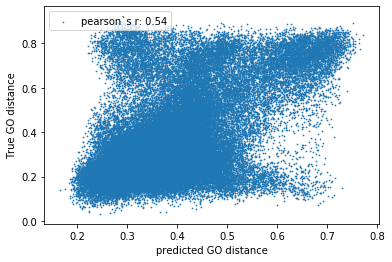

In [22]:
from utility.evaluator import model_evaluate
import numpy as np
from matplotlib import pyplot as plt
true = np.array(df_cold.value)
pred = np.array(df_cold.mu)
get_eval=model_evaluate(pred,true,test_params["prec_threshold"],df_cold)
print(get_eval)
plt.scatter(pred,true,s = 0.5, label = "pearson`s r: "+str(round(get_eval['cor'][0],2)))
plt.xlabel("predicted GO distance")
plt.ylabel("True GO distance")
plt.legend(loc='upper left')
plt.show()